# Psychometric function (PF)

The psychometric function (PF) is about relation between human performance (e.g., classification) on a psychophysical task and sensory inputs (e.g., stimulus intensity). Recall that a general psychometric function:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$
where $\alpha$ is the threshold, $\beta$ sensitivity, $\gamma$ chance level, and $\lambda$ lapse rate. 
Several candidate functions can be used for psychometric functions $F(x,\alpha, \beta)$:

* logit function
* cumulative Gaussian function
* Weibull

The Logit function is relative simple:

$$ \log \frac{P}{1-P} = \beta(x-\alpha), $$
where $P$ is the prop. of the positive responses, and $1-P$ is the prop. of the negative response. $\log \frac{P}{1-P}$ is log-likelihood of two alternative responses (sometimes it is called decision variable), which is assumed to be a linear function of the stimulus intensity $X$. The above equation can be transformed to 

$$ P = \frac{1}{1+ e^{-\beta(x-\alpha)}}$$

From the equation, we can easily obtained the point of subjective equality (PSE, $\alpha$) and just noticeable difference (JND). Notice, the JND is defined by the difference between thresholds $P=0.5$ and $P=0.75$ (for 1AFC), so 

$$JND = \log3/\beta$$
That is, when the slope $\beta$ becomes steeper, the JND becomes smaller. 

# Usage of Bayesfit module

## 1. Installation

Use the github version, instead of directly installation (has a minor bug). 

In [ ]:
pip install https://github.com/SlugocM/bayesfit/zipball/master

     - 6.2MB 8.9MB/s
  Created wheel for bayesfit: filename=bayesfit-2.3-cp36-none-any.whl size=38822 sha256=95676cd9182238a61b35db38bda891d0ac89d15a15e7d1f377af5da6523f7cdb
  Stored in directory: /tmp/pip-ephem-wheel-cache-9_u9ibwg/wheels/3e/13/07/47215414b704877badb3c2cb9bb00aec8b71c26d014518bfe0
Successfully built bayesfit


The basic usage of Bayesfit is to apply `bayesfit.fitmodel()` to your data. You need to provide the data in a Numpy array, whereby columns are organized according: Intensity, N-trials Correct, N-trials Total. 

See details [here](http://www.slugocm.ca/bayesfit/fitmodel.html). 

Let's try one example first:

In [ ]:
%matplotlib inline
import bayesfit as bf
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt

# we creat one hypothetical data, first column (intensity), second column (number of correct trials), third column (number of total trials)
data = np.array([[0.0010,   45,   90],
                 [0.0015,   50,   90],
                 [0.0020,   44,   90],
                 [0.0025,   44,   90],
                 [0.0030,   52,   90],
                 [0.0035,   53,   90],
                 [0.0040,   62,   90],
                 [0.0045,   64,   90],
                 [0.0050,   76,   90],
                 [0.0060,   79,   90],
                 [0.0070,   88,   90],
                 [0.0080,   90,   90],
                 [0.0100,   90,   90]])



Now you can apply `fitmodel()` to the data, and plot the fitted function using `plot_psyfcn()`. 

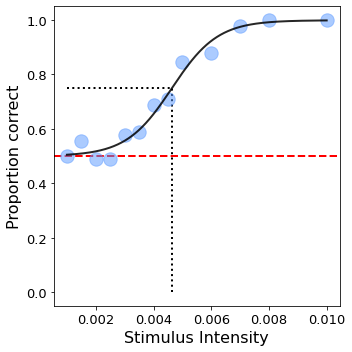

In [ ]:
metrics, options = bf.fitmodel(data, nafc = 2)
bf.plot_psyfcn(data, options, metrics)

In [ ]:
metrics['MAP']

array([4.63636364e-03, 1.25943237e+03,            nan,            nan])

In [ ]:
# the estimated parameters is stored in metrics. 
print(metrics['MAP']) # estimation of alpha, beta, gamma, lambda
print(metrics['SD']) # related SD of the parameters
print(metrics['threshold']) # threshold

[4.63636364e-03 1.25943237e+03            nan            nan]
[1.23345445e-03 2.02180031e+01            nan            nan]
0.00463996399639964


# A case study: Influence of music tempo on the duration judgment

In the study, same classic music pieces were manipulated and played in three different tempo: slow, medium, and faster. The length of the music piece was randomly select from 2 to 8 seconds. Participants had to judge if the music piece was a 'short' or a 'long' one. Participants had to estimate the 'short' or 'long' based on the past trials they received. The research question is if the music tempo alters the time judgment.  

A sample experimental data that contains three participants' responses can be found [here](https://raw.githubusercontent.com/strongway/r-statistics/master/data/music_bisection.csv).


Recall our previous session on logistic regression with the same dataset. 

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/strongway/r-statistics/master/data/music_bisection.csv', sep = ';')
dat.head()


,Participant,Duration,Tempo,Stimuli_Nu,Decision,Music_Duration
0,Sub101,2,1,10,1,2.001604
1,Sub101,6,3,10,2,6.000169
2,Sub101,5,1,4,2,5.000097
3,Sub101,7,1,8,2,7.000105
4,Sub101,2,3,1,1,2.000080


In [ ]:
#let's check how many subjects in the dataset
dat.Participant.unique()

array(['Sub101', 'Sub102', 'Sub103'], dtype=object)

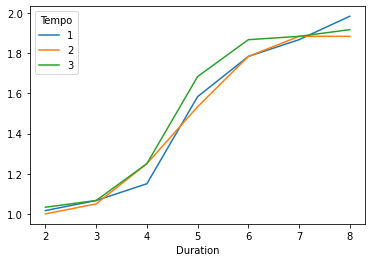

In [ ]:
# quickly visualize responses for three participants
dat.pivot_table( 'Decision', 'Duration','Tempo' ).plot()

$$ \log\frac{P}{1-P} = bX$$

let $p = 0.5$, then we have
$$0 = b0 + b1X_{threshold}$$

$$X_t = -\frac{b_0}{b_1}$$

In [ ]:
# 3. we want to estimate individual conditions for individual participant, so we first get out unique subjects and unique tempi. 

Subjects = dat.Participant.unique()
Tempi = dat.Tempo.unique()
dat = dat.assign(resp = dat.Decision -1)
#store thresholds 
thresholds = pd.DataFrame(np.zeros((3,3)),index = Subjects,columns = Tempi)

for sub in Subjects:
  for Tempo in Tempi:
    curDat = dat.query(f"Participant == '{sub}' & Tempo == {Tempo}")
    X = sm.add_constant(curDat.Duration) # we need the intercept, so add a contant column 1 here
    log_reg = sm.Logit(curDat.resp,X).fit()
    # below is calcualte the threshold p=0.5, x = - a/b (details in another session in Psychophysics)
    thresholds.loc[sub, Tempo] = - log_reg.params.const/log_reg.params.Duration 
    #print([sub, Tempo])
    #print(log_reg.summary())
print(thresholds)

Optimization terminated successfully.
         Current function value: 0.263577
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375010
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.251414
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.413735
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.349591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272002
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381504
         Iterations 7
               1         3         2
Sub101  6.158646  5.673695  6.132493
Sub102  

__Note:__ The above logistic analysis only assume the response curve is logistic curve without restrictions. That is, the logistic function doesn't have any guess rate $\gamma$ or lapse rate $\lambda$. In addition, if you want to plot the fitted curve, you need to do it yourself. `Bayesfit` or `Psignifit` provide additional functionality. For example, `Bayesfit` provide Bayes approach, you can specify the prior of the parameters. 

## Using Bayesfit approach

Let's first try one condition from one participant. 

In [ ]:
dat.head()

,Participant,Duration,Tempo,Stimuli_Nu,Decision,Music_Duration,resp
0,Sub101,2,1,10,1,2.001604,0
1,Sub101,6,3,10,2,6.000169,1
2,Sub101,5,1,4,2,5.000097,1
3,Sub101,7,1,8,2,7.000105,1
4,Sub101,2,3,1,1,2.000080,0


In [ ]:
sub = Subjects[1]
Tempo = Tempi[1] 

# select one condition
curDat = dat.query(f"Participant == '{sub}' & Tempo == {Tempo}")

# aggregate the positive responses and total responses
c = curDat.groupby('Duration').agg({'resp':'sum', 'Tempo':'count'}).reset_index().to_numpy()

c


array([[ 2,  2, 20],
       [ 3,  3, 20],
       [ 4,  8, 20],
       [ 5, 14, 20],
       [ 6, 19, 20],
       [ 7, 19, 20],
       [ 8, 18, 20]])

Note the task is to judge the tempo is close to 'fast' or 'slow' with single stimulus. So it is 1IFC with two alterative responses. We need to set the guess rate and lapse rate in the estimation. 

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/bayesfit/extractMetrics.py:92: RuntimeWarning: divide by zero encountered in true_divide
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))
/usr/local/lib/python3.6/dist-packages/bayesfit/extractMetrics.py:92: RuntimeWarning: invalid value encountered in log
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))


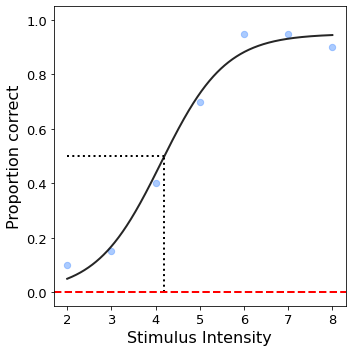

4.199219921992199


In [ ]:
metrics, options = bf.fitmodel(c, nafc = 2, param_free=[True, True, False, True], param_ests=[5, 1, 0, .2], threshold = 0.5) # we fix the guess and lapse rate to 0
bf.plot_psyfcn(c, options, metrics)
print(metrics['threshold'])

In [ ]:
metrics['MAP']

array([4.12121212, 1.36868687,        nan, 0.05059495])

In [ ]:
#store thresholds 
thresholds = pd.DataFrame(np.zeros((3,3)),index = Subjects,columns = Tempi)

# now we estimate all of them
for sub in Subjects:
  for Tempo in Tempi:
    curDat = dat.query(f"Participant == '{sub}' & Tempo == {Tempo}")\
      .groupby('Duration').agg({'resp':'sum', 'Tempo':'count'})\
      .reset_index().to_numpy()
    metrics, options = bf.fitmodel(curDat, nafc = 2, param_ests=[5, 1, 0, 0], threshold = 0.5) # we fix the guess and lapse rate to 0
    #bf.plot_psyfcn(c, options, metrics)
    thresholds.loc[sub, Tempo] = metrics['threshold']

# alternative, you can use batch option (see offical website example)
# metrics, options = bf.fitmodel(ddat, batch = True,  nafc = 2, param_free = [True, True, False, False], threshold = 0.5) # we fix the guess and lapse rate to 0


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/bayesfit/extractMetrics.py:92: RuntimeWarning: invalid value encountered in true_divide
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))
/usr/local/lib/python3.6/dist-packages/bayesfit/extractMetrics.py:92: RuntimeWarning: divide by zero encountered in log
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))
/usr/local/lib/python3.6/dist-packages/bayesfit/extractMetrics.py:92: RuntimeWarning: invalid value encountered in multiply
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))
/usr/local/lib/python3.6/dist-packages/bayesfit/extractMetrics.py:92: RuntimeWarning: divide by zero encountered in true_divide
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))
/usr/local/lib/python3.6/dist-packages/bayesfit/extractMet

In [ ]:
thresholds

,1,3,2
Sub101,6.181818,5.636364,6.121212
Sub102,4.363636,4.303030,4.727273
Sub103,4.606061,4.363636,4.424242
